In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Functions

In [61]:
# import reusable functions from utils directory
import sys
sys.path.append('../../utils')
import functions

## Read and clean data

# Final Demo DF

In [62]:
final_demo_df = pd.read_csv('../../data/raw/df_final_demo.txt')
final_demo_df.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [63]:
# clean column names
functions.clean_column_names(final_demo_df)

# inspect dataframe
functions.inspect_dataframe(final_demo_df)

Check the shape (rows, columns):
(70609, 9)

Column names:
Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

Data types:
client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object

Missing values:
client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64


In [64]:
# change column names for standardization
new_column_names_final_demo_df = {
    'client_id': 'client_id',
    'clnt_tenure_yr': 'client_tenure_years',
    'clnt_tenure_mnth': 'client_tenure_months',
    'clnt_age': 'client_age',
    'gendr': 'gender',
    'num_accts': 'num_accounts',
    'bal': 'balance',
    'calls_6_mnth': 'calls_last_6_months',
    'logons_6_mnth': 'logons_last_6_months'
}

final_demo_df.rename(columns=new_column_names_final_demo_df, inplace=True)

In [65]:
# check unique values
functions.check_unique_and_empty(final_demo_df)

Summary of Unique and Empty Values:

                      Unique value count  Empty value count
Column                                                     
client_id                          70609                  0
client_tenure_years                   54                 14
client_tenure_months                 482                 14
client_age                           165                 15
gender                                 4                 14
num_accounts                           8                 14
balance                            70328                 14
calls_last_6_months                    8                 14
logons_last_6_months                   9                 14

--------------------------------------------------



In [66]:
final_demo_df.head()

,client_id,client_tenure_years,client_tenure_months,client_age,gender,num_accounts,balance,calls_last_6_months,logons_last_6_months
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [67]:
# handle unique values in 'gender' column

functions.handle_unique_gender_values(final_demo_df)

['U' 'M' 'F' nan 'X']


,client_id,client_tenure_years,client_tenure_months,client_age,gender,num_accounts,balance,calls_last_6_months,logons_last_6_months
0,836976,6.0,73.0,60.5,Unspecified,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,Unspecified,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,Unspecified,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,Male,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,Female,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,Unspecified,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,Male,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,Female,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,Male,3.0,475114.69,4.0,4.0


In [68]:
# convert floats to ints in several columns
functions.floats_to_ints(final_demo_df, 'client_tenure_years')
functions.floats_to_ints(final_demo_df, 'client_tenure_months')
functions.floats_to_ints(final_demo_df, 'num_accounts')
functions.floats_to_ints(final_demo_df, 'calls_last_6_months')
functions.floats_to_ints(final_demo_df, 'logons_last_6_months')
functions.floats_to_ints(final_demo_df, 'client_age')
functions.check_unique_and_empty(final_demo_df)

Summary of Unique and Empty Values:

                      Unique value count  Empty value count
Column                                                     
client_id                          70609                  0
client_tenure_years                   54                 14
client_tenure_months                 482                 14
client_age                            84                 15
gender                                 4                  0
num_accounts                           8                 14
balance                            70328                 14
calls_last_6_months                    8                 14
logons_last_6_months                   9                 14

--------------------------------------------------



In [69]:
# drop empty values
final_demo_df = final_demo_df.dropna()
# check_unique_and_empty(final_demo_df)

# initial rows: 70609, rows after dropping empty values: 70594

final_demo_df.head()

,client_id,client_tenure_years,client_tenure_months,client_age,gender,num_accounts,balance,calls_last_6_months,logons_last_6_months
0,836976,6,73,60,Unspecified,2,45105.30,6,9
1,2304905,7,94,58,Unspecified,2,110860.30,6,9
2,1439522,5,64,32,Unspecified,2,52467.79,6,9
3,1562045,16,198,49,Male,2,67454.65,3,6
4,5126305,12,145,33,Female,2,103671.75,0,3


In [70]:
functions.inspect_dataframe(final_demo_df)
functions.check_unique_and_empty(final_demo_df)

Check the shape (rows, columns):
(70594, 9)

Column names:
Index(['client_id', 'client_tenure_years', 'client_tenure_months',
       'client_age', 'gender', 'num_accounts', 'balance',
       'calls_last_6_months', 'logons_last_6_months'],
      dtype='object')

Data types:
client_id                 int64
client_tenure_years       Int64
client_tenure_months      Int64
client_age                Int64
gender                   object
num_accounts              Int64
balance                 float64
calls_last_6_months       Int64
logons_last_6_months      Int64
dtype: object

Missing values:
client_id               0
client_tenure_years     0
client_tenure_months    0
client_age              0
gender                  0
num_accounts            0
balance                 0
calls_last_6_months     0
logons_last_6_months    0
dtype: int64
Summary of Unique and Empty Values:

                      Unique value count  Empty value count
Column                                                     
cli

In [71]:
# generate clean csv file
final_demo_df.to_csv('final_demo_df_clean.csv', index=False)

# Final Experiment Clients DF

In [72]:
final_experiment_clients_df = pd.read_csv('../../data/raw/df_final_experiment_clients.txt')
final_experiment_clients_df.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [73]:
# clean column names
functions.clean_column_names(final_experiment_clients_df)

# inspect df
functions.inspect_dataframe(final_experiment_clients_df)
functions.check_unique_and_empty(final_experiment_clients_df)

Check the shape (rows, columns):
(70609, 2)

Column names:
Index(['client_id', 'variation'], dtype='object')

Data types:
client_id     int64
variation    object
dtype: object

Missing values:
client_id        0
variation    20109
dtype: int64
Summary of Unique and Empty Values:

           Unique value count  Empty value count
Column                                          
client_id               70609                  0
variation                   2              20109

--------------------------------------------------



In [74]:
# check unique values
functions.check_unique_and_empty(final_experiment_clients_df)

Summary of Unique and Empty Values:

           Unique value count  Empty value count
Column                                          
client_id               70609                  0
variation                   2              20109

--------------------------------------------------



In [75]:
# replace empty values with 'unknown'

final_experiment_clients_df = final_experiment_clients_df.apply(lambda col: col.apply(lambda x: 'Unknown' if pd.isna(x) or x == '' else x))

functions.check_unique_and_empty(final_experiment_clients_df)

Summary of Unique and Empty Values:

           Unique value count  Empty value count
Column                                          
client_id               70609                  0
variation                   3                  0

--------------------------------------------------



In [76]:
# generate clean csv file
# final_experiment_clients_df.to_csv('final_experiment_clients_df.csv', index=False)

### Variation Count

In [77]:
variation_percentages = final_experiment_clients_df['variation'].value_counts(normalize=True) * 100

print(variation_percentages)

variation
Test       38.193431
Control    33.327196
Unknown    28.479372
Name: proportion, dtype: float64


/tmp/ipykernel_137361/2120130577.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=variation_counts.index, y=variation_counts.values, palette=colors)


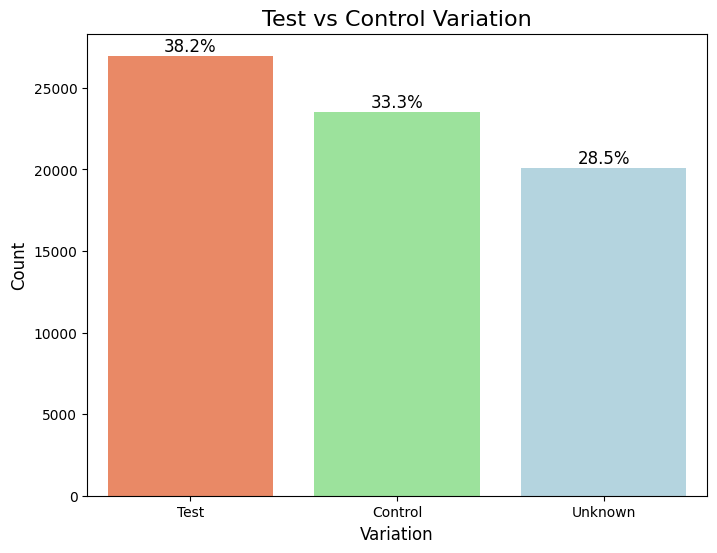

In [78]:
variation_counts = final_experiment_clients_df['variation'].value_counts()

variation_percentages = variation_counts / variation_counts.sum() * 100

colors = ['coral', 'lightgreen', 'lightblue']

plt.figure(figsize=(8, 6))
sns.barplot(x=variation_counts.index, y=variation_counts.values, palette=colors)

plt.title('Test vs Control Variation', fontsize=16)
plt.xlabel('Variation', fontsize=12)
plt.ylabel('Count', fontsize=12)

# annotate each bar with the percentage
for i, p in enumerate(plt.gca().patches):
    height = p.get_height()
    # add annotation with the percentage on top of each bar
    plt.text(p.get_x() + p.get_width() / 2, height + 0.1, f'{variation_percentages.iloc[i]:.1f}%', 
             ha='center', va='bottom', fontsize=12, color='black')

plt.show()

## Questions:

1. Primary clients using the online process
2. Are the primary clients younger or older?
3. Are the primary clients newer or long-standing?

In [79]:
# clients using the online process (logons_last_6_months > 5)
primary_clients = final_demo_df[final_demo_df['logons_last_6_months'] > 5]

# We can compare the average age of primary clients vs. the full dataset
avg_age_all_clients = round(final_demo_df['client_age'].mean())
avg_age_primary_clients = round(primary_clients['client_age'].mean())


# We can compare the average tenure in years of primary clients vs. the full dataset
avg_tenure_all_clients = round(final_demo_df['client_tenure_years'].mean())
avg_tenure_primary_clients = round(primary_clients['client_tenure_years'].mean())

# Output the results
print(f'Primary clients:\n{primary_clients[['client_id', 'client_age', 'client_tenure_years', 'logons_last_6_months']]}\n')
print(f'Average age of all clients: {avg_age_all_clients}')
print(f'Average age of primary clients: {avg_age_primary_clients}')
print(f'Are primary clients younger or older? {'Younger' if avg_age_primary_clients < avg_age_all_clients else 'Older'}\n')
print(f'Average tenure of all clients: {avg_tenure_all_clients}')
print(f'Average tenure of primary clients: {avg_tenure_primary_clients}')
print(f'Are primary clients newer or long-standing? {'Newer' if avg_tenure_primary_clients < avg_tenure_all_clients else 'Long-standing'}')

Primary clients:
       client_id  client_age  client_tenure_years  logons_last_6_months
0         836976          60                    6                     9
1        2304905          58                    7                     9
2        1439522          32                    5                     9
3        1562045          49                   16                     6
8         285619          67                   30                     6
...          ...         ...                  ...                   ...
70590    2721884          53                   15                     6
70592    4277747          40                   12                     6
70593    7217125          58                   14                     6
70605    8981690          31                   12                     6
70608    5602139          59                   21                     7

[34930 rows x 4 columns]

Average age of all clients: 46
Average age of primary clients: 47
Are primary clients younge

## Combine DFs

- By now, `final_demo_df` has **70594 rows**, and `final_experiment_clients_df` has **70609 rows**.

In [80]:
# check how many client ids match

client_ids_df1 = set(final_demo_df['client_id'])
client_ids_df2 = set(final_experiment_clients_df['client_id'])

# find the intersection
matching_ids = client_ids_df1.intersection(client_ids_df2)
num_matching_ids = len(matching_ids)

print(f'Matching client ids in both dataframes: {num_matching_ids}')

Matching client ids in both dataframes: 70594


In [81]:
# merge dataframes based on 'client_id', adding the 'variation' column
merged_variations_final_demo_df = pd.merge(final_demo_df, final_experiment_clients_df[['client_id', 'variation']], on='client_id', how='left')

# sort values by the original index
merged_variations_final_demo_df = merged_variations_final_demo_df.sort_index()

print(merged_variations_final_demo_df)

       client_id  client_tenure_years  client_tenure_months  client_age  \
0         836976                    6                    73          60   
1        2304905                    7                    94          58   
2        1439522                    5                    64          32   
3        1562045                   16                   198          49   
4        5126305                   12                   145          33   
...          ...                  ...                   ...         ...   
70589    7993686                    4                    56          38   
70590    8981690                   12                   148          31   
70591     333913                   16                   198          61   
70592    1573142                   21                   255          68   
70593    5602139                   21                   254          59   

            gender  num_accounts     balance  calls_last_6_months  \
0      Unspecified            

In [82]:
# export to csv 
merged_variations_final_demo_df.to_csv('../../data/clean/merged_final_demo_final_experiment_clients_df.csv', index=False)

In [83]:
combined_cleaned_df = pd.read_csv('../../data/clean/combined_cleaned_data.csv')
combined_cleaned_df.head(50)

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
5,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:17:15
6,9988021,580560515_7732621733,781255054_21935453173_531117,step_1,2017-04-17 15:17:01
7,9988021,580560515_7732621733,781255054_21935453173_531117,start,2017-04-17 15:16:22
8,8320017,39393514_33118319366,960651974_70596002104_312201,confirm,2017-04-05 13:10:05
9,8320017,39393514_33118319366,960651974_70596002104_312201,step_3,2017-04-05 13:09:43


In [84]:
functions.check_unique_and_empty(combined_cleaned_df)

Summary of Unique and Empty Values:

              Unique value count  Empty value count
Column                                             
client_id                 120157                  0
visitor_id                130236                  0
visit_id                  158095                  0
process_step                   5                  0
date_time                 629363                  0

--------------------------------------------------



In [85]:
functions.inspect_dataframe(combined_cleaned_df)

Check the shape (rows, columns):
(744641, 5)

Column names:
Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time'], dtype='object')

Data types:
client_id        int64
visitor_id      object
visit_id        object
process_step    object
date_time       object
dtype: object

Missing values:
client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64


In [ ]:
# change step values

replacement_dict_steps = {
    'start' : 0,
    'step_1' : 1,
    'step_2' : 2,
    'step_3' : 3,
    'confirm' : 4
}

combined_cleaned_df['process_step'] = combined_cleaned_df['process_step'].map(replacement_dict_steps)

In [90]:
print(combined_cleaned_df['process_step'].unique())


[3 2 1 0 4]


In [91]:
combined_cleaned_df['date_time'] = pd.to_datetime(combined_cleaned_df['date_time'], errors='coerce')

# check if any dates couldn't be converted (i.e., they are NaT)
inconsistent_dates = combined_cleaned_df['date_time'].isna().sum()

# If inconsistent_dates > 0, then there are invalid or mismatched date formats
if inconsistent_dates > 0:
    print(f'There are {inconsistent_dates} inconsistent or invalid date formats in the column.')
else:
    print('All dates in the column have the same format.')

print(combined_cleaned_df[['date_time']].head())

All dates in the column have the same format.
            date_time
0 2017-04-17 15:27:07
1 2017-04-17 15:26:51
2 2017-04-17 15:19:22
3 2017-04-17 15:19:13
4 2017-04-17 15:18:04


In [92]:
functions.inspect_dataframe(combined_cleaned_df)

Check the shape (rows, columns):
(744641, 5)

Column names:
Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time'], dtype='object')

Data types:
client_id                int64
visitor_id              object
visit_id                object
process_step             int64
date_time       datetime64[ns]
dtype: object

Missing values:
client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64
